---
title: 21天学通C++ Chapter9 类和对象
tags: 小书匠,c++,21天学通C++
grammar_cjkRuby: true
renderNumberedHeading: true
---

[toc]

# 21天学通C++ Chapter9 类和对象

## public 和 private

1. 实现访问控制
2. 实现数据抽象

In [1]:
#include <iostream>
#include <string>

class Human {
    private:
        std::string name_;
        int age_;
    public:
        int GetAge() { return age_;}
        void SetAge(int age) { return age_ = age;}
    
};


In [2]:
Human eve;
std::cout << eve.GetAge(); 
// std::cout << eve.age_; // compile error 不能访问 private 对象

0

@0x10a01dc30

## 构造函数

### 没有默认构造函数的类

In [3]:
#include <iostream>
#include <string>

class Human {
    private:
        int age_;
        std::string name_;
    public:
        Human(int age, std::string name) {
            age_ = age;
            name_ = name;
        }
        void sayHello() { std::cout << "Hello I'm " << name_ << ", " 
                         << age_ << " years old\n";}
};

In [4]:
// Human edward; // compile error 不能不传参，因为没有默认构造函数
Human edward(13, "edward");
edward.sayHello();

Hello I'm edward, 13 years old


### 使用构造函数列表

In [5]:
#include <iostream>
#include <string>

class Human {
    private:
        std::string name_;
        int age_;
    public:
        Human(std::string name, int age):  name_(name), age_(age) {}
    
};

In [6]:
Human edward("edward", 13);

## 析构函数

析构函数的作用和构造函数相反，是用来删除对象的。主要是用来删除对象做管理的指针空间。

In [7]:
#include <iostream>

class MyString {
    private:
        char* buffer;
    public: 
        MyString(const char* initString) {
            if (initString) {
                buffer = new char[strlen(initString) + 1];
                strcpy(buffer, initString);
            }
            else
            {
                buffer = NULL;
            }
        }
        ~MyString() {
            std::cout << "Invoking destructor, clearing up\n"; 
            if (buffer)
                delete [] buffer;
        }
        int getLen() {
            return strlen(buffer);
        }
        const char* c_str() {
            return buffer;
        }
};

In [8]:
int main()
{
    MyString s("edward");
    std::cout << s.c_str() << "\n";
    std::cout << s.getLen() << "\n";
    return 0;
}

In [9]:
main();

edward
6
Invoking destructor, clearing up


## 复制构造函数

### 浅拷贝存在的问题

In [10]:
#include <iostream>

class MyString {
    private:
        char* buffer;
    public: 
        MyString(const char* initString) {
            if (initString) {
                buffer = new char[strlen(initString) + 1];
                strcpy(buffer, initString);
            }
            else
            {
                buffer = NULL;
            }
        }
        ~MyString() {
            std::cout << "Invoking destructor, clearing up\n"; 
            if (buffer)
                delete [] buffer;
        }
        void show() {
            std::cout << buffer << std::endl;
        }
        int getLen() {
            return strlen(buffer);
        }
        const char* c_str() {
            return buffer;
        }
};

In [11]:
void UseMyString(MyString str) 
{
    std::cout << "String buffer in Mystring is " << str.c_str() << "\n";
    return ;
}

In [12]:
int main()
{
    MyString sayHello("hello world");
    UseMyString(sayHello); // 这里会调用复制构造函数
    return 0;
}

// main(); // crash 

这其中的一个问题就是，UseMyString 接受 MyString 类型的参数是 pass by value，此时会调用复制构造函数。默认是浅拷贝每个对象，因此

1. 当程序运行到 UseMyString 中时，实际上有两个对象 str 和 sayHello，他们都有一个指向同一块内存地址的指针。
2. 当程序 UseMyString 执行完时，会清除 UseMyString 本地的变量，此时会调用 str 对象的析构函数函数将堆中的数据删除掉。
3. 而当 main 函数返回的时候，会清除 sayHello 对象，此时调用调用 sayHello 对象的析构函数函数时，发现它对应的堆中的数据已经被删掉掉了，因此报错。

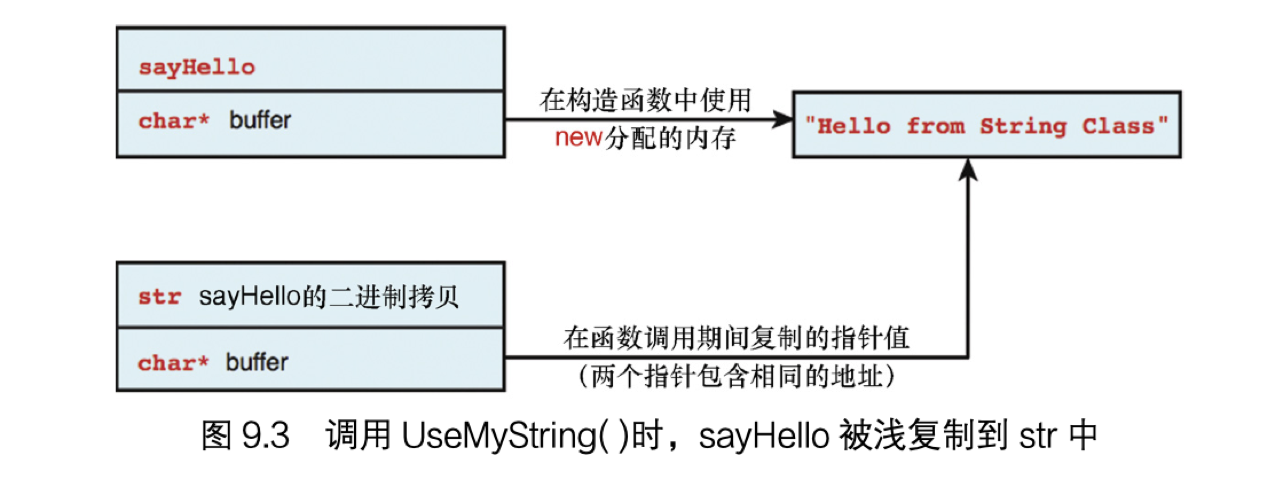

### 使用复制构造函数确保深拷贝

刚才的浅拷贝的问题是由于我们使用了默认的复制构造函数导致的。这种情况下我们可以重写复制构造函数，让其深拷贝。所谓深拷贝，就是当复制指针的时候，不要复制指针，而是要重新在堆中开辟一块内存区域。

In [13]:
#include <iostream>

class MyString {
    private:
        char* buffer;
    public: 
        MyString(const char* initString) {
            if (initString) {
                buffer = new char[strlen(initString) + 1];
                strcpy(buffer, initString);
            }
            else
            {
                buffer = NULL;
            }
        }
    
        MyString(const MyString& str)  // copy constructor
        {
            if (str.buffer) {
                buffer = new char[strlen(str.buffer) + 1];
                strcpy(buffer, str.buffer);
                std::cout << "Copy Constructor: source str point to " << (unsigned int*)str.buffer << "\n";
                std::cout << "Copy Constructor: copied str point to " << (unsigned int*)buffer << "\n";
            }
            else 
            {
                buffer = NULL;
            }
        }
    
        ~MyString() {
            std::cout << "Invoking destructor, clearing up\n"; 
            if (buffer)
                delete [] buffer;
        }
        void show() {
            std::cout << buffer << "\n";
        }
        int getLen() {
            return strlen(buffer);
        }
        const char* c_str() {
            return buffer;
        }
};

In [14]:
void UseMyString(MyString str) 
{
    std::cout << "String buffer in Mystring is " << str.c_str() << "\n";
    return ;
}

In [15]:
int main()
{
    MyString sayHello("hello world");
    UseMyString(sayHello); // 这里会调用复制构造函数
    return 0;
}

main(); // crash 

Copy Constructor: source str point to 0x7ffa69e28f30
Copy Constructor: copied str point to 0x7ffa69e0a1e0
String buffer in Mystring is hello world
Invoking destructor, clearing up
Invoking destructor, clearing up


0

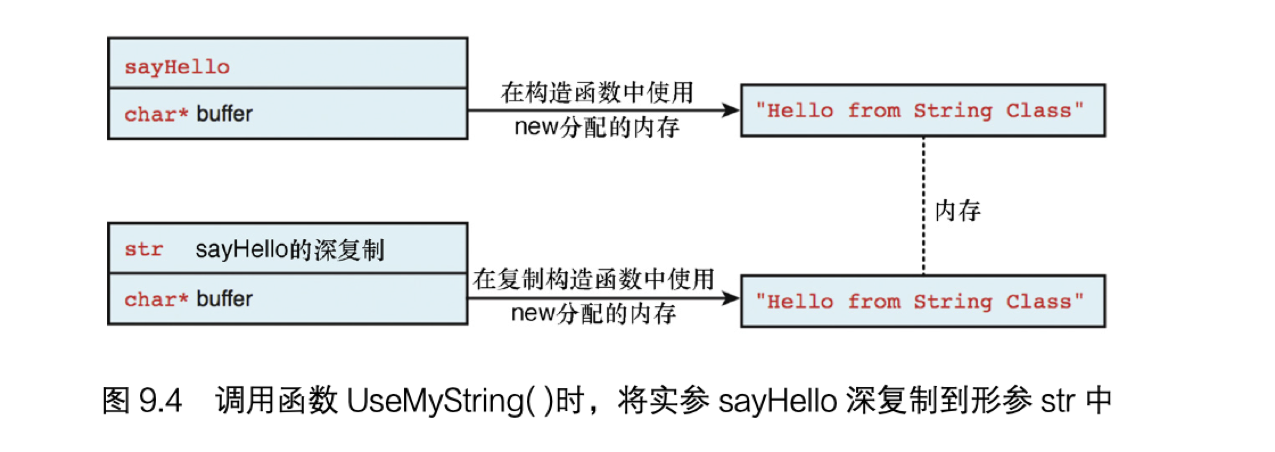

从上面可以看到，复制构造函数长这个样子

```cpp
MyString(const MyString& str)  // copy constructor
```

为什么长这个样子？为什么要用 const 修改是引用呢？

1. 使用 const，因为复制构造函数不能修改被复制的对象。
2. 使用 reference，不能 pass by value，因为复制构造函数是在对象进行值传递的时候调用的，而如果复制构造函数本身也采用值传递的话，那么这个过程中会无限调用自己，直到内存耗尽。为什么会无限调用自己？

### 移动构造函数

不知道为啥。这个东西咋和想象中的不一样。

In [16]:
#include <iostream>

class MyString{
    private:
        char* buffer;
    public:
        MyString(const char* s) {
            std::cout << "Invoking constructor\n";
            if (s) {
               buffer = new char[strlen(s) + 1];
                strcpy(buffer, s);
            }
            else 
            {
                buffer = NULL;
            }
        }
        MyString(const MyString& source) // copy constructor
        {
            std::cout << "Invoking copy constructor\n";
            if (source.buffer) {
               buffer = new char[strlen(source.buffer) + 1];
               strcpy(buffer, source.buffer);
            }
            else 
            {
                buffer = NULL;
            }
        }
        MyString(const MyString&& source) {
            std::cout << "Invoking move constructor\n";
        }
        const char* c_str() const { return buffer; }
};

In [17]:
MyString Copy(const MyString& source) {
    MyString copied(source.c_str());
    return copied; // return by value, invokes copy constructor
}

In [18]:
int main() 
{
    MyString sayHello("Hello World!");
    MyString anotherSayHello(Copy(sayHello)); // invokes copy constructor
    return 0;
}
main();

Invoking constructor
Invoking constructor


### 构造函数的其他用途

#### 禁止复制和赋值

只需要将 copy constructor 和 operator= 声明为 private 就可以，不需要提供实现

In [19]:
#include <iostream>
class President
{
    private:
        President(const President&);
        President& operator=(const President&);
    public:
        President() {}
};

In [20]:
void DoSomething(President president) 
{
    std::cout << "Invoking DoSomething\n";
}

In [21]:
President president;
// DoSomething(president); // compile error

#### 单例

通过类似的想法，我们可以实现单例模式：将构造函数私有化，这样就不能在外部通过调用构造函数来生成多个实例了。为此，我们需要提供一个类方法，它检测是否存在这个类的实例，如果有，那么就返回。如果没有，那么就调用构造函数创建一个后返回。

In [22]:
class President
{
    private:
        President() {};
        President(const President&);
        const President& operator=(const President&);
        std::string name_;
    public:
        static President& GetInstance() // 这个只能返回引用
        {
            static President onlyInstance;
            return onlyInstance;
        }
        std::string getName() {return name_;}
        void setName(std::string name) { name_ = name;}
};

In [23]:
President& instance = President::GetInstance()

### 禁止在栈上实例化对象

使用场景：如果对象十分巨大，如设计一个数据库对象，那么我们需要禁止在栈上实例化对象。

如何实现？ 

1. 这可以通过将析构函数私有化实现，因为栈上的对象在程序结束时会销毁，此时会自动调用析构函数。如果将析构函数私有化，那么就不能导致自动调用析构函数从而会导致编译错误。
2. 同时，由于我们将析构函数给私有化了，因此我们需要通过其他方式来手动调用析构函数。我们可以提供一个类方法来调用析构函数。

In [24]:
class DataBase {
    private:
        ~DataBase();
    public:
        static void destoryInstance(DataBase* pInstance) 
        {
            delete pInstance;
        }
        void doSomething()
        {
            std::cout << "Hello! I'm database\n";
        }
};

In [25]:
// DataBase db; // variable of type 'DataBase' has private destructor

In [26]:
typedef DataBase* pDataBase;
pDataBase db;
db->doSomething();
// delete db; //compile error
DataBase::destoryInstance(db)

IncrementalExecutor::executeFunction: symbol '_ZN12__cling_N5278DataBaseD1Ev' unresolved while linking [cling interface function]!
You are probably missing the definition of __cling_N527::DataBase::~DataBase()
Maybe you need to load the corresponding shared library?


Interpreter Error: 

### 使用构造函数进行类型转换

In [27]:
#include <iostream>

class Human {
    private: 
        int age_;
    public:
        Human(int age) { 
            std::cout << "Invoking consturctor\n";
            age_ = age;
        }
        int getAge() { return age_;}
};

In [28]:
void sayAge(Human human) {
    std::cout << human.getAge() << "\n";
}

In [29]:
Human tom(10); // explicit conversion
Human jack = 11; // implicit conversion
sayAge(12) // implicit conversion

Invoking consturctor
Invoking consturctor
Invoking consturctor
12


其中，后两种形式实际上是调用了构造函数完成的 implicit conversion

可以使用 explicit 关键字来避免 implicit conversion

In [30]:
class Human {
    private: 
        int age_;
    public:
        explicit Human(int age) { age_ = age;}
        int getAge() { return age_;}
};

In [31]:
void sayAge(Human human) {
    std::cout << human.getAge() << "\n";
}

In [32]:
Human tom(10); // OK explicit conversion
// Human jack = 11; // compile error; implicit conversion
// sayAge(12) // compile error; implicit conversion

## this 指针

## 友元

In [33]:
#include <iostream>
#include <string>

class Human
{
    private: 
        friend void DisplayAge(const Human&);
        std::string name;
        int age;
    public:
        Human(std::string name, int age): name(name), age(age) {}
};

In [34]:
void DisplayAge(const Human& human) {
    // 访问私有属性
    std::cout << human.age << "\n";
}

In [35]:
int main() {
    Human human("edward", 13);
    DisplayAge(human);
}
main();

13


### 将类声明为友元

In [36]:
#include <iostream>
#include <string>

class Human {
    private:
        friend class Utility;
        std::string name;
        int age;
    public:
        Human(std::string name, int age): name(name), age(age) {}
};

In [37]:
class Utility {
    public:
        static void DisplayAge(const Human& human) {
            std::cout << human.age << "\n";
        }
};

In [38]:
int main() {
    Human human("edward", 13);
    Utility::DisplayAge(human);
    return 0;
}
main();

13


# References

- 21天学通 C++ 第8版 第九章